# Done By : Sara AlHerbawi  0191107 ,Tala Kafafi 0197035 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import sklearn
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score                                                   
from sklearn.model_selection import cross_val_score ,cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [3]:
data = pd.read_csv('Traffic.csv')

In [4]:
data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31.0,0.0,4.0,4.0,39,low
1,12:15:00 AM,10,Tuesday,49.0,0.0,3.0,3.0,55,low
2,12:30:00 AM,10,Tuesday,46.0,0.0,3.0,6.0,55,low
3,12:45:00 AM,10,Tuesday,51.0,0.0,2.0,5.0,58,low
4,1:00:00 AM,10,Tuesday,57.0,6.0,15.0,16.0,94,normal
...,...,...,...,...,...,...,...,...,...
2971,10:45:00 PM,9,Thursday,16.0,3.0,1.0,36.0,56,normal
2972,11:00:00 PM,9,Thursday,11.0,0.0,1.0,30.0,42,normal
2973,11:15:00 PM,9,Thursday,15.0,4.0,1.0,25.0,45,normal
2974,11:30:00 PM,9,Thursday,16.0,5.0,0.0,27.0,48,normal


In [5]:
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p').dt.strftime('%H')

In [6]:
data.head(20)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,00,10,Tuesday,31.0,0.0,4.0,4.0,39,low
1,00,10,Tuesday,49.0,0.0,3.0,3.0,55,low
2,00,10,Tuesday,46.0,0.0,3.0,6.0,55,low
3,00,10,Tuesday,51.0,0.0,2.0,5.0,58,low
4,01,10,Tuesday,57.0,6.0,15.0,16.0,94,normal
5,01,10,Tuesday,44.0,0.0,5.0,4.0,53,low
6,01,10,Tuesday,37.0,0.0,1.0,4.0,42,low
7,01,10,Tuesday,42.0,4.0,4.0,5.0,55,low
8,02,10,Tuesday,51.0,0.0,9.0,7.0,67,low
9,02,10,Tuesday,34.0,0.0,4.0,7.0,45,low


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time               2976 non-null   object 
 1   Date               2976 non-null   int64  
 2   Day of the week    2976 non-null   object 
 3   CarCount           2973 non-null   float64
 4   BikeCount          2973 non-null   float64
 5   BusCount           2974 non-null   float64
 6   TruckCount         2969 non-null   float64
 7   Total              2976 non-null   int64  
 8   Traffic Situation  2976 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 209.4+ KB


In [8]:
data["Traffic Situation"].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

In [9]:
data.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2973.000000,2973.000000,2974.000000,2969.000000,2976.000000
mean,16.000000,68.659603,14.908174,15.268662,15.311553,114.218414
std,8.945775,45.845062,12.845075,14.333451,10.603374,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


# Handling text and categorical features

In [10]:
data['Traffic Situation'] = data['Traffic Situation'].replace({'low':0 , 'normal':1 ,'high':2 , 'heavy':3 })
             

In [11]:
data['Day of the week'] = data['Day of the week'].replace({'Monday':2,'Tuesday':3,
                                                          'Wednesday':4,'Thursday':5,
                                                          'Friday':6,'Saturday':7,
                                                          'Sunday':1})

In [12]:
data['Time'] = data['Time'].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time               2976 non-null   int32  
 1   Date               2976 non-null   int64  
 2   Day of the week    2976 non-null   int64  
 3   CarCount           2973 non-null   float64
 4   BikeCount          2973 non-null   float64
 5   BusCount           2974 non-null   float64
 6   TruckCount         2969 non-null   float64
 7   Total              2976 non-null   int64  
 8   Traffic Situation  2976 non-null   int64  
dtypes: float64(4), int32(1), int64(4)
memory usage: 197.8 KB


# Prepare the Data for Machine Learning Algorithms

# Handle missing data


In [14]:
data.Date.unique().size


31

In [15]:
data.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             3
BikeCount            3
BusCount             2
TruckCount           7
Total                0
Traffic Situation    0
dtype: int64

In [16]:
median_car = data["CarCount"].median()
data["CarCount"].fillna(median_car, inplace=True)

We filled the null values with the median of its column

In [17]:
median_Bike = data["BikeCount"].median()
data["BikeCount"].fillna(median_Bike, inplace=True)

In [18]:
median_Bus = data["BusCount"].median()
data["BusCount"].fillna(median_Bus, inplace=True)

In [19]:
median_truck = data["TruckCount"].median()
data["TruckCount"].fillna(median_truck, inplace=True)

In [20]:
data.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

we checked that all missing values are filled

# Assignment 2 states from here

This data contains 8 features (Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Day of the week ) some with encoded values :
-day_numbe  
(sunday : 1 , monday : 2 , tuesday : 3 , wednsday : 4 , thursday : 5 , friday : 6 , saturday : 7)

-we change the Time format to 24 Hours

our target is predecting the Traffic Situation  :
(low : 0 , normal : 1 , high : 2 , heavy : 3 )

In [21]:
data

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,10,3,31.0,0.0,4.0,4.0,39,0
1,0,10,3,49.0,0.0,3.0,3.0,55,0
2,0,10,3,46.0,0.0,3.0,6.0,55,0
3,0,10,3,51.0,0.0,2.0,5.0,58,0
4,1,10,3,57.0,6.0,15.0,16.0,94,1
...,...,...,...,...,...,...,...,...,...
2971,22,9,5,16.0,3.0,1.0,36.0,56,1
2972,23,9,5,11.0,0.0,1.0,30.0,42,1
2973,23,9,5,15.0,4.0,1.0,25.0,45,1
2974,23,9,5,16.0,5.0,0.0,27.0,48,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time               2976 non-null   int32  
 1   Date               2976 non-null   int64  
 2   Day of the week    2976 non-null   int64  
 3   CarCount           2976 non-null   float64
 4   BikeCount          2976 non-null   float64
 5   BusCount           2976 non-null   float64
 6   TruckCount         2976 non-null   float64
 7   Total              2976 non-null   int64  
 8   Traffic Situation  2976 non-null   int64  
dtypes: float64(4), int32(1), int64(4)
memory usage: 197.8 KB


# split the data into train and test set

In [23]:
target=data['Traffic Situation'].copy()
feature= data.drop(['Traffic Situation'], axis=1)

In [24]:
x_train, x_test, y_train, y_test = train_test_split( feature,target,test_size=0.2, random_state=42)

# Classifications

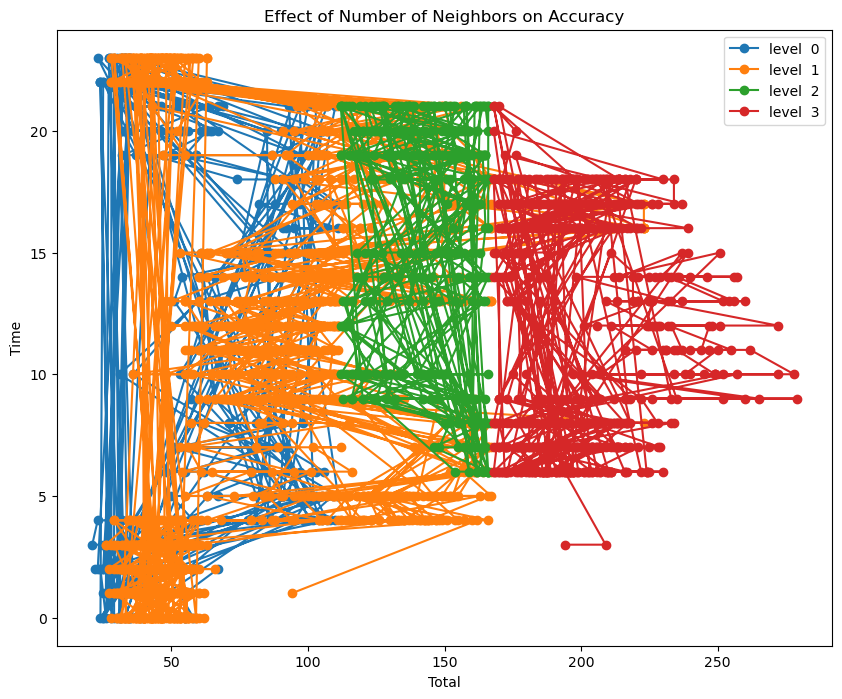

In [25]:
plt.figure(figsize=(10, 8))

types=[0,1,2,3]

for traffic_type in types:
    subset = data[data['Traffic Situation'] == traffic_type]
    plt.plot(subset['Total'], subset['Time'], marker='o', label=f'level  {traffic_type}')

plt.xlabel('Total')
plt.ylabel('Time')
plt.title('Effect of Number of Neighbors on Accuracy')


plt.legend()


plt.show()

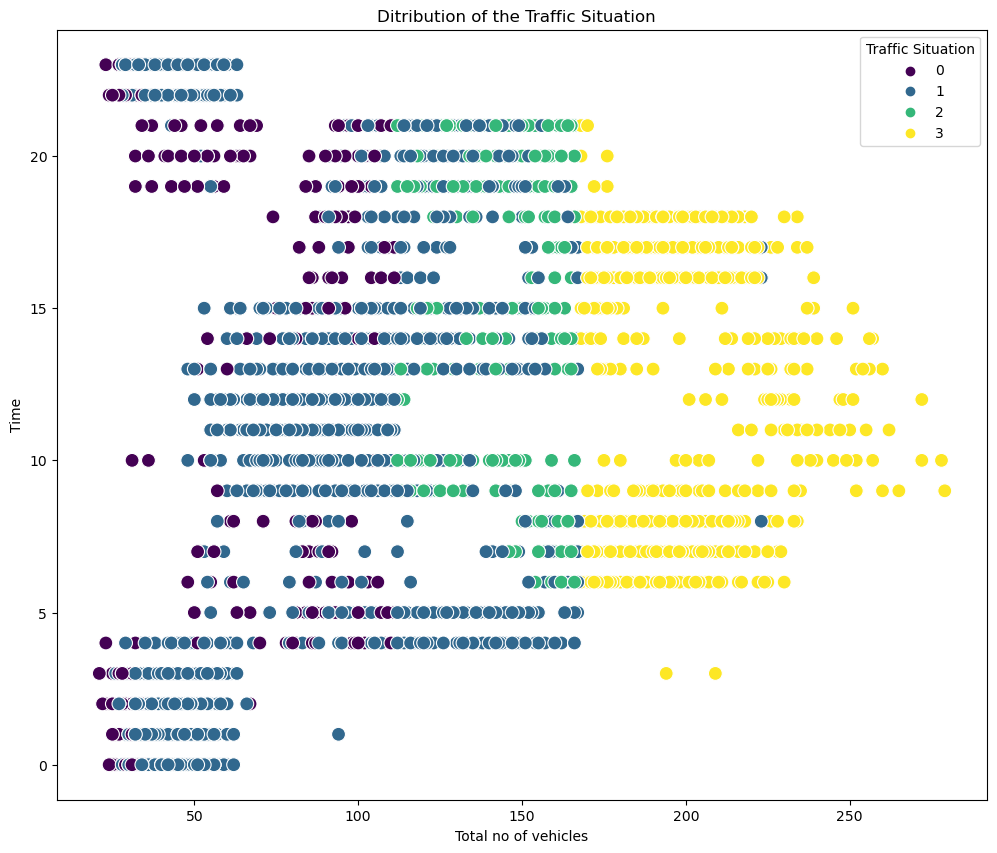

In [26]:
label_encoder = LabelEncoder()
data['Traffic Situation'] = label_encoder.fit_transform(data['Traffic Situation'])

plt.figure(figsize=(12, 10))

sns.scatterplot(x='Total', y='Time', hue='Traffic Situation', data=data, palette='viridis', s=100)

plt.xlabel('Total no of vehicles')
plt.ylabel('Time')
plt.title('Ditribution of the Traffic Situation  ')

plt.show()


The previous figures show the distribution of our 4 levels target with respect to the time and Total number of vehicles, as u can see the levels are slightly separated by these two features 

In [27]:
logisicC = LogisticRegression()
scores = cross_val_score(logisicC, x_train, y_train, scoring='accuracy', cv=3)
scores

array([0.75062972, 0.77931904, 0.77805801])

here we tried to train our set using the LogisticRegression classifier, but the accuracy is not that good 

# scale features

ML algorithms generally don’t perform well when the input numerical attributes have very different scales so we used the StandardScaler to rescale the inputs

In [28]:
standard_scaler = StandardScaler()
x_train=standard_scaler.fit_transform(x_train)
x_test=standard_scaler.fit_transform(x_test)

# LogisticRegression()

In [29]:
logisic1 = LogisticRegression()
scores = cross_val_score(logisic1, x_train, y_train, scoring='accuracy', cv=3)
scores

array([0.89420655, 0.8852459 , 0.90037831])

As we can see the accuracy is getting butter just by doing scaling on the features

now lets modify the hyperparameters of the model to achive higher accuracy 

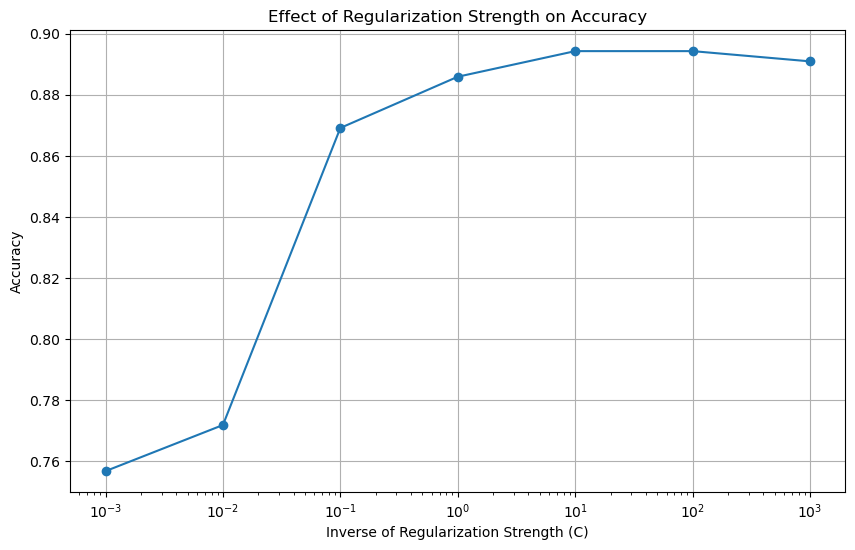

In [30]:
def train_and_evaluate(C):
    model = LogisticRegression(C=C, random_state=42)
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    return accuracy


C_values = np.logspace(-3, 3, 7)

accuracies = [train_and_evaluate(C) for C in C_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Inverse of Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization Strength on Accuracy')
plt.grid(True)
plt.show()

C = float, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

as we can see whenever C increases , the accuracy increasses as well .It acctually control the number of violations . When C is high that means no violations are allowed , that will improve the accuracy but may cause overfitting  

We found out the best accuracy is achived when c = 10 

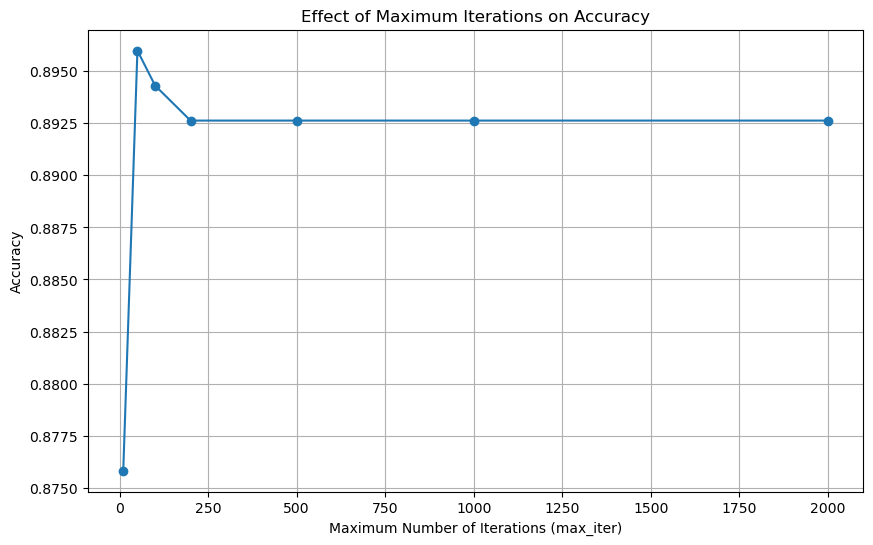

In [32]:
def train_and_evaluate(M):
    model = LogisticRegression(C=100, max_iter=M, random_state=42)
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    return accuracy


M = [10, 50, 100, 200, 500, 1000, 2000]


accuracies = [train_and_evaluate( max_iter) for max_iter in M]


plt.figure(figsize=(10, 6))
plt.plot(M, accuracies, marker='o')
plt.xlabel('Maximum Number of Iterations (max_iter)')
plt.ylabel('Accuracy')
plt.title('Effect of Maximum Iterations on Accuracy')
plt.grid(True)
plt.show()

max_iter : int, default=100
Maximum number of iterations taken for the solvers to converge.

It perform the maximum number of iterations for the optimization algorithm to find the best model weights . you have to choose apropriate value to avoid longe training times.

We found out the best accuracy is achived when max_iter = 200 

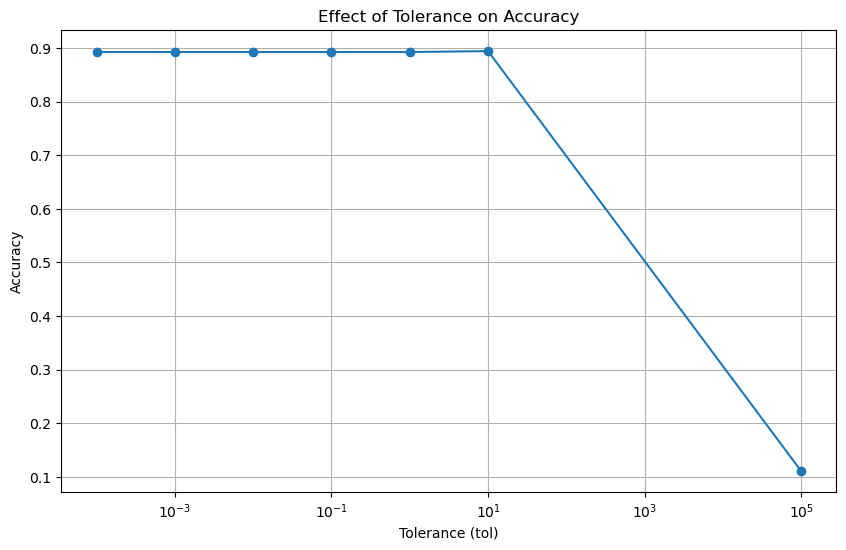

In [33]:
def train_and_evaluate(tol):
    model = LogisticRegression(C=100 ,tol=tol , max_iter=200, random_state=42)
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    return accuracy


tol_values = [1e-4, 1e-3, 1e-2, 1e-1, 1,1e1,1e5]

accuracies = [train_and_evaluate(tol) for tol in tol_values]

plt.figure(figsize=(10, 6))
plt.semilogx(tol_values, accuracies, marker='o')
plt.xlabel('Tolerance (tol)')
plt.ylabel('Accuracy')
plt.title('Effect of Tolerance on Accuracy')
plt.grid(True)
plt.show()

tol : float, default=1e-4
Tolerance for stopping criteria

to determine the tolerence value that is accepted and not overfitted 

We found out the best accuracy is achived when tol = .1

In [34]:
Logistic2 = LogisticRegression(C=100 ,tol=.1 ,max_iter=200 , random_state=42)
logistic_accuracy = cross_val_score(Logistic2, x_train, y_train, scoring='accuracy', cv=3)
logistic_accuracy


array([0.89798489, 0.89281211, 0.90542245])

we trained our dataset on the model with best hyperparameter , and as we can see the performance is improved  

In [35]:
Logistic2.fit(x_train,y_train)
y_pred =Logistic2.predict(x_test)
accuracy_score(y_test, y_pred)

0.8926174496644296

we tried to test our model on the testset . the accuracy is good and there is no overfitting since it is close to the accuracy of the training set 

# KNeighborsClassifier()

In [36]:
KNNC=KNeighborsClassifier()
scores = cross_val_score(KNNC, x_train, y_train, scoring='accuracy', cv=3)
scores

array([0.87783375, 0.88776797, 0.8776797 ])

this is the accuracy when using KNeighborsClassifier() on our dataset  without dealing with the hyperparameters

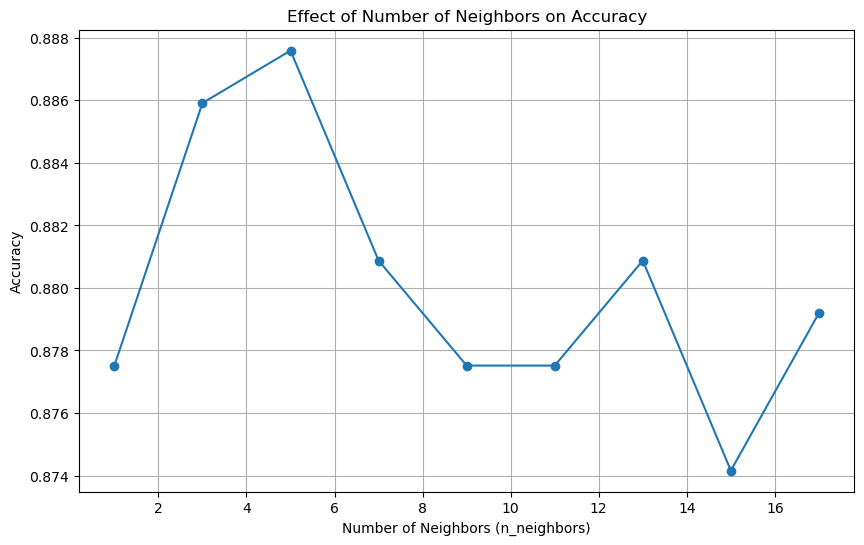

In [37]:
def train_and_evaluate(n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    return accuracy

n_neighbors_values = [1, 3, 5, 7, 9, 11, 13,15,17]

accuracies = [train_and_evaluate(n_neighbors) for n_neighbors in n_neighbors_values]

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Neighbors on Accuracy')
plt.grid(True)
plt.show()

n_neighbors : int, default=5
Number of neighbors to use by default for kneighbors queries.

KNN is an instance-based learning, each time I predict I will measure the distance btw the new instance and the neighbors ,so i can choose the number of neighbors to mesure the distance with

We found out the best accuracy is achived when n_neighbors = 5

In [38]:
KNNC1=KNeighborsClassifier(n_neighbors=5)
KNN_accuracy = cross_val_score(KNNC1, x_train, y_train, scoring='accuracy', cv=3)
KNN_accuracy

array([0.87783375, 0.88776797, 0.8776797 ])

In [39]:
KNNC1.fit(x_train,y_train)
y_pred =KNNC1.predict(x_test)
accuracy_score(y_test, y_pred)

0.8875838926174496

we tried to test our model on the testset . the accuracy is good and there is no overfitting since it is close to the accuracy of the training set 

# SVC (Support Vector Classification)

In [40]:
svcC= SVC()
scores= cross_val_score(SVC(), x_train, y_train, cv=3)
scores

array([0.91561713, 0.91677175, 0.91551072])

The Support Vector Classification (SVC) is a specific implementation of SVM for classification

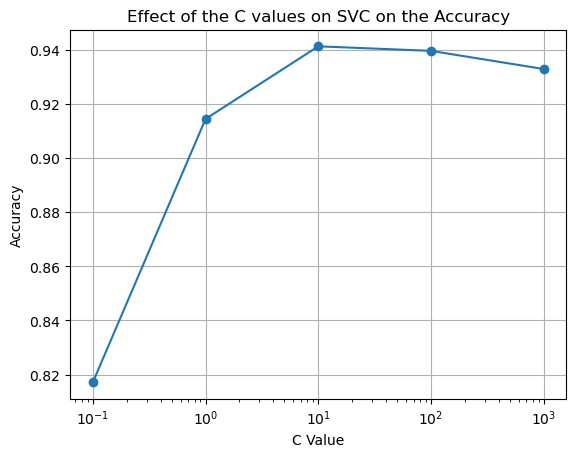

In [41]:
C_values = [0.1, 1, 10, 100, 1000]
accuracy_scores = []

for C in C_values:
    svc_classifier = SVC(C=C)
    svc_classifier.fit(x_train, y_train)

    y_pred = svc_classifier.predict(x_test)
 
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(C_values, accuracy_scores, marker='o')
plt.xscale('log')  
plt.title('Effect of the C values on SVC on the Accuracy')
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

C : float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

We found out the best accuracy is achived when C = 10

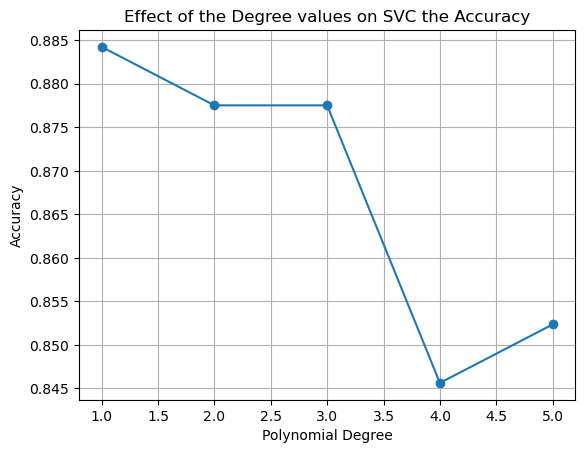

In [42]:
degree_values = [1, 2, 3, 4, 5]
accuracy_scores = []


for degree in degree_values:
    
    svc_classifier = SVC(kernel='poly', degree=degree)
    svc_classifier.fit(x_train, y_train)

    y_pred = svc_classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results
plt.plot(degree_values, accuracy_scores, marker='o')
plt.title('Effect of the Degree values on SVC the Accuracy')
plt.xlabel('Polynomial Degree')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used.

degree : int, default=3
Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.

when increasing the degree the number of violations will decrease , but may cause overfitting at some point

We found out the best accuracy is achived when degree = 1 

In [43]:
svcC1= SVC(C=10 ,kernel='poly', degree=1)
SVC_accuracy = cross_val_score(svcC1, x_train, y_train, scoring='accuracy', cv=3)
SVC_accuracy

array([0.90050378, 0.89155107, 0.90668348])

In [44]:
svcC1.fit(x_train,y_train)
y_pred =svcC1.predict(x_test)
accuracy_score(y_test, y_pred)

0.8926174496644296

we tried to test our model on the testset . the accuracy is good and there is no overfitting since it is close to the accuracy of the training set 

# RandomForestClassifier()

In [45]:
RFC = RandomForestClassifier()
scores= cross_val_score(RFC, x_train, y_train, cv=3)
scores

array([0.99496222, 0.99495586, 0.99495586])

Random forest is an ensemble(group of predictors) of Decision Trees  

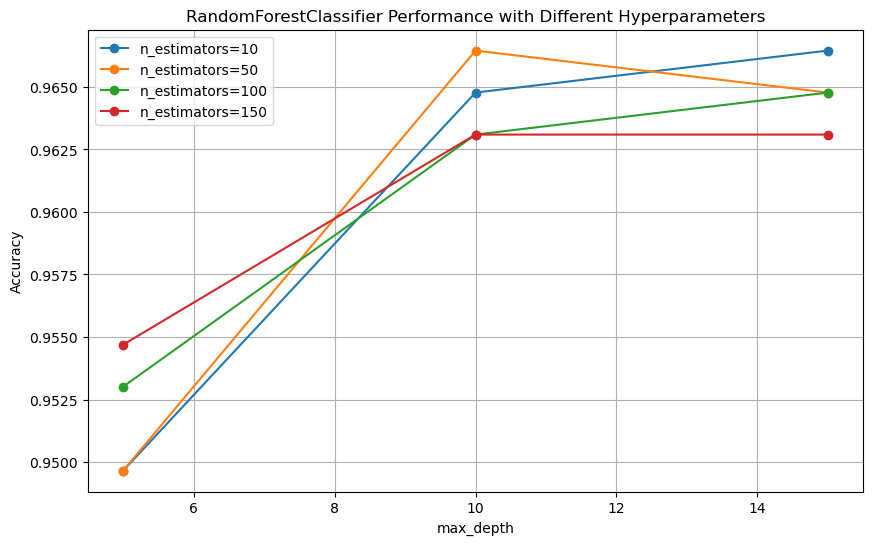

In [46]:
n_estimators_values = [10, 50, 100, 150]
max_depth_values = [None, 5, 10, 15]
accuracy_scores = np.zeros((len(n_estimators_values), len(max_depth_values)))

for i, n_estimators in enumerate(n_estimators_values):
    for j, max_depth in enumerate(max_depth_values):
        rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_classifier.fit(x_train, y_train)
        

        y_pred = rf_classifier.predict(x_test)
        

        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[i, j] = accuracy


fig, ax = plt.subplots(figsize=(10, 6))
for i, n_estimators in enumerate(n_estimators_values):
    plt.plot(max_depth_values, accuracy_scores[i, :], marker='o', label=f'n_estimators={n_estimators}')

plt.title('RandomForestClassifier Performance with Different Hyperparameters')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

n_estimators : int, default=100
The number of trees in the forest.

since the random forest is an ensemble that means it have group of predictors called estimators , we can choose the number of estimators to be used

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

We found out the best accuracy is achived when n_estimators=50 and  max_depth=10

In [47]:
RFC1 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
RF_accuracy = cross_val_score(RFC1, x_train, y_train, scoring='accuracy', cv=3)
RF_accuracy

array([0.99244332, 0.98991173, 0.9924338 ])

In [48]:
RFC1.fit(x_train,y_train)
y_pred =RFC1.predict(x_test)
accuracy_score(y_test, y_pred)

0.9664429530201343

we tried to test our model on the testset . the accuracy is good and there is no overfitting since it is close to the accuracy of the training set 

# DecisionTreeClassifier()

In [49]:
DTC =tree.DecisionTreeClassifier(random_state=42)
dtc=DTC.fit(x_train, y_train)

Decision tree create a tree-like model of decisions based on input features, where each node in the tree represents a decision based on a particular feature, and each leaf node represents the outcome or prediction

DecisionTree plot


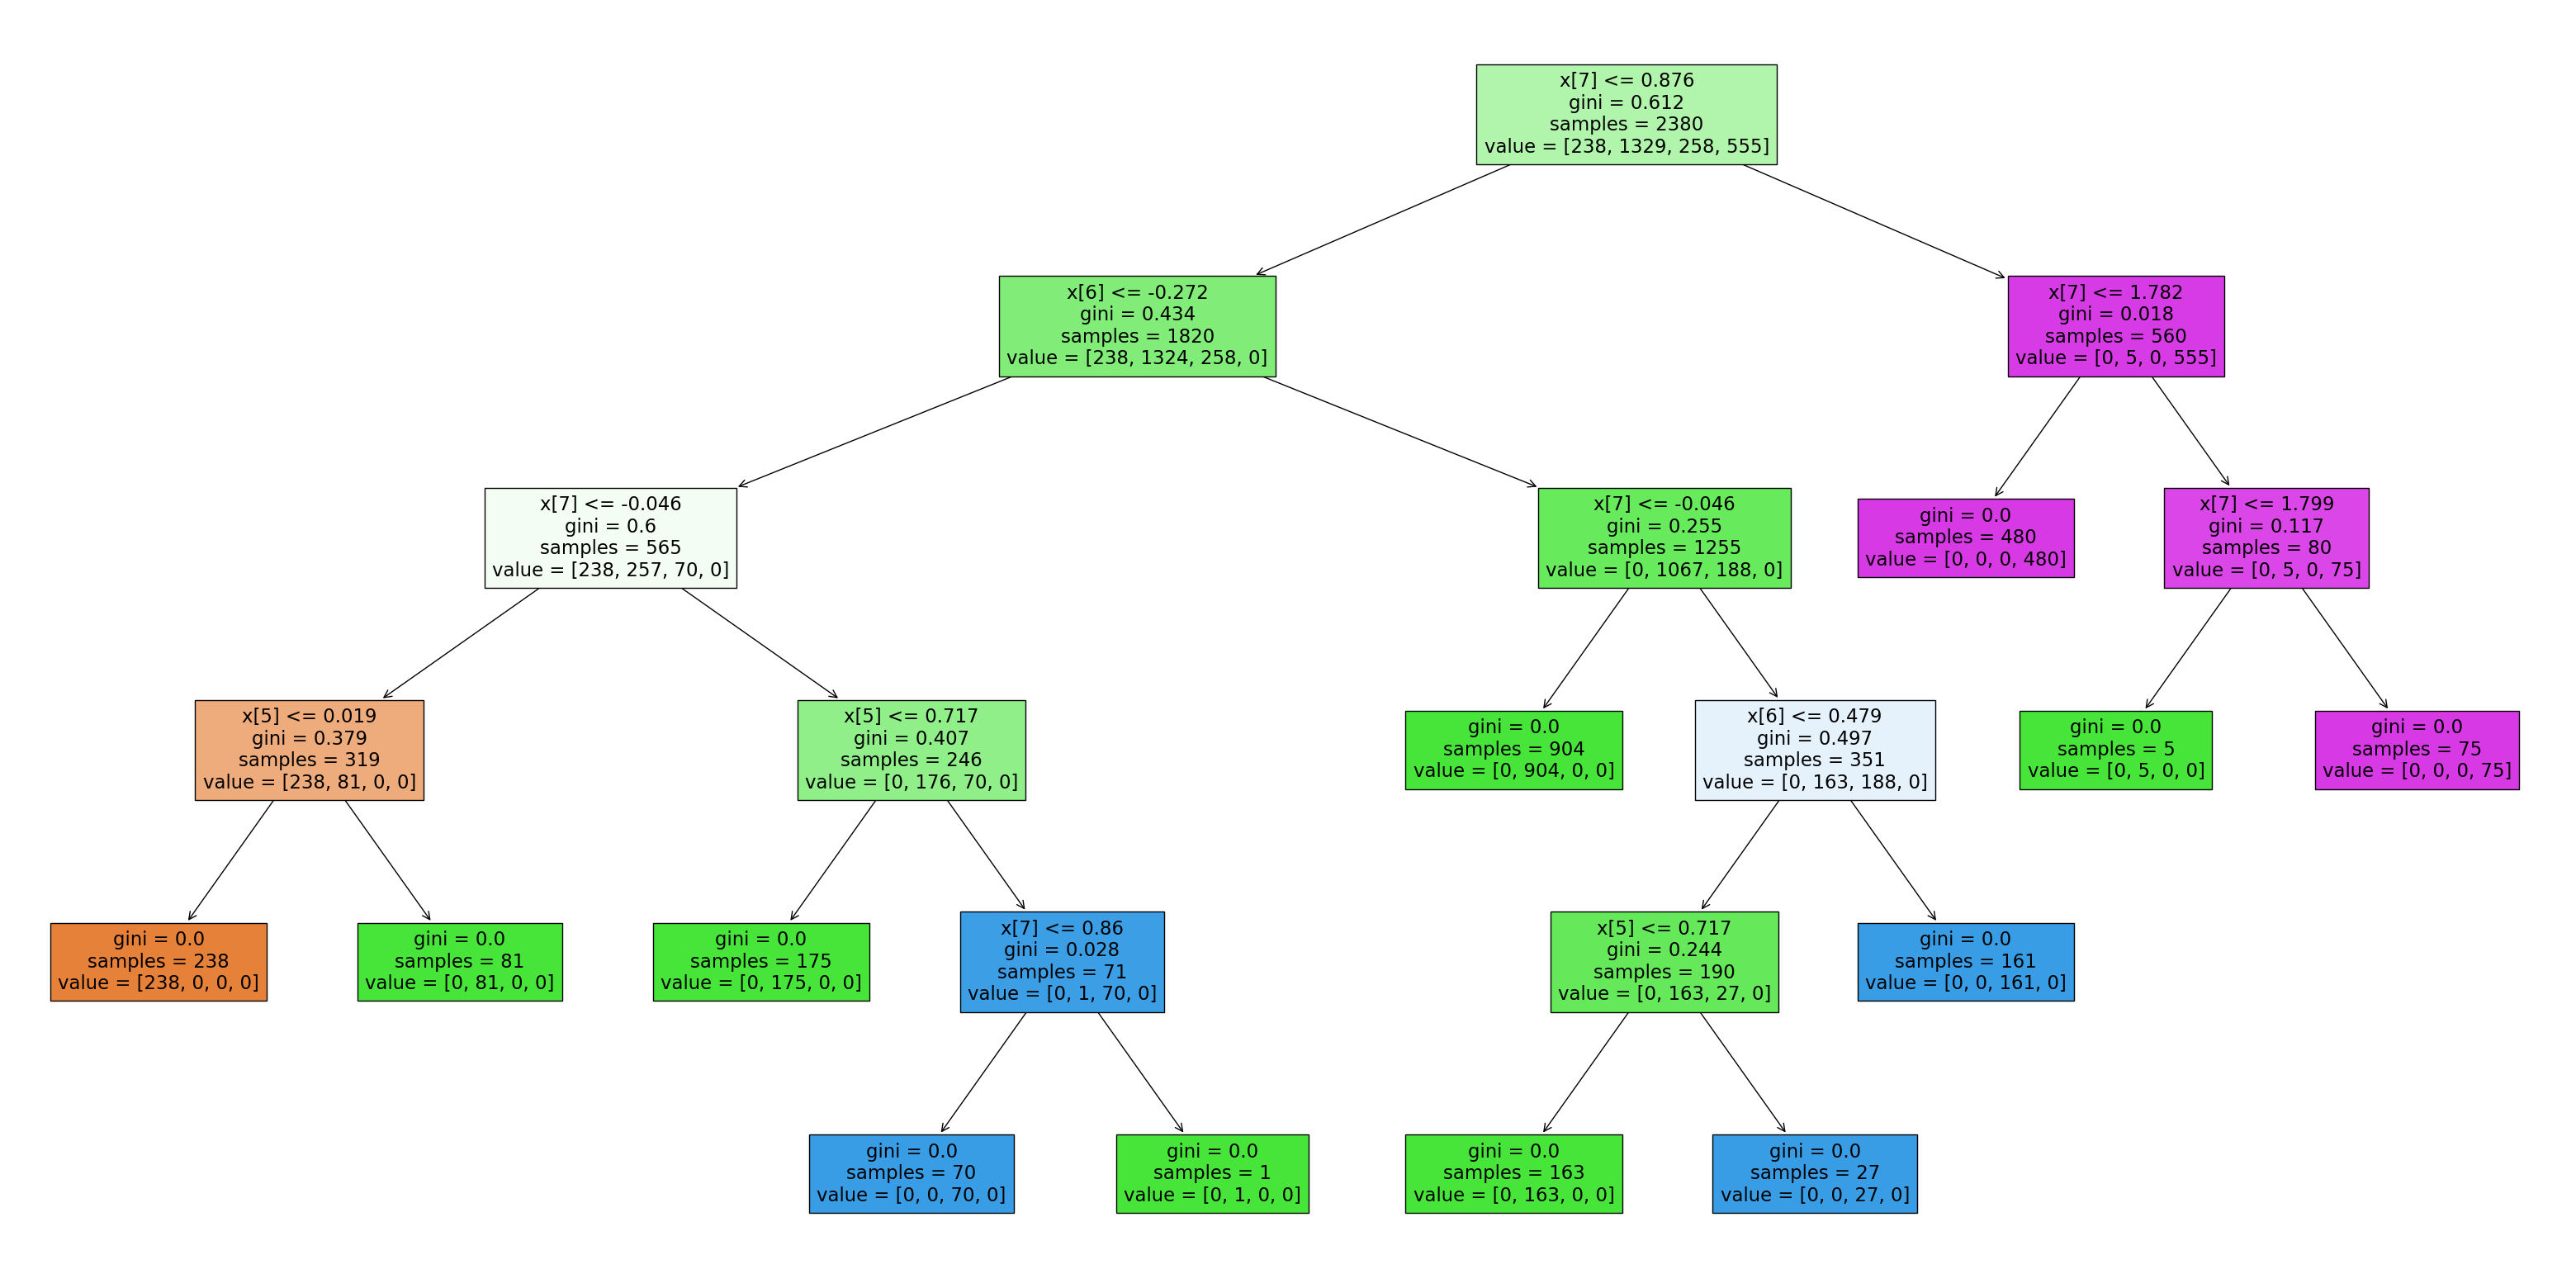

In [50]:
plt.figure(figsize=(40,20))
tree.plot_tree(dtc,filled=True)
print('DecisionTree plot')

this graph explains how the decision trees work. it starts from the root node that contains all the data then start to separate them based on specific criteria

Gini impurity is a metric that quantifies the level of impurity or disorder in a set of data points

gini(impurity)=1−∑i=1c(pi)2

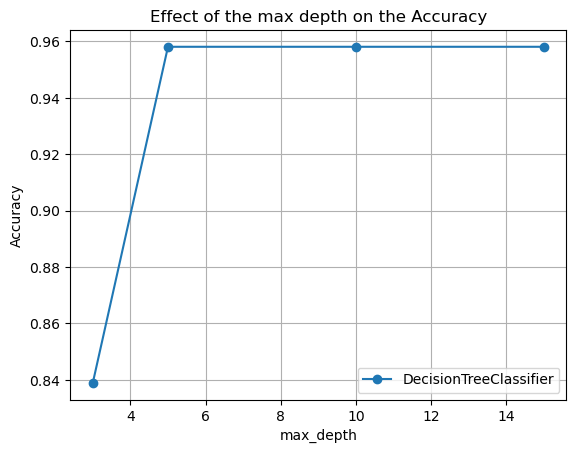

In [51]:
max_depth_values = [None, 3 ,5, 10, 15]
accuracy_scores = []

for max_depth in max_depth_values:
    dt_classifier = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_classifier.fit(x_train, y_train)
    
 
    y_pred = dt_classifier.predict(x_test)
    
  
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(max_depth_values, accuracy_scores, marker='o', label='DecisionTreeClassifier')
plt.title('Effect of the max depth on the Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

max_depth : int, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

We found out the best accuracy is achived when max_depth = 5

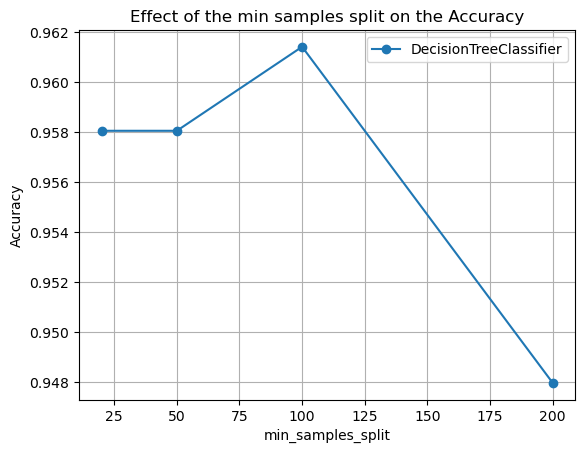

In [52]:
min_samples_split_values = [20, 50, 100, 200]
accuracy_scores = []


for min_samples_split in min_samples_split_values:

    dt_classifier = tree.DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    dt_classifier.fit(x_train, y_train)
    

    y_pred = dt_classifier.predict(x_test)
    
   
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(min_samples_split_values, accuracy_scores, marker='o', label='DecisionTreeClassifier')
plt.title('Effect of the min samples split on the Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

min_samples_split : int or float, default=2
The minimum number of samples required to split an internal node

We found out the best accuracy is achived when max_depth = 100

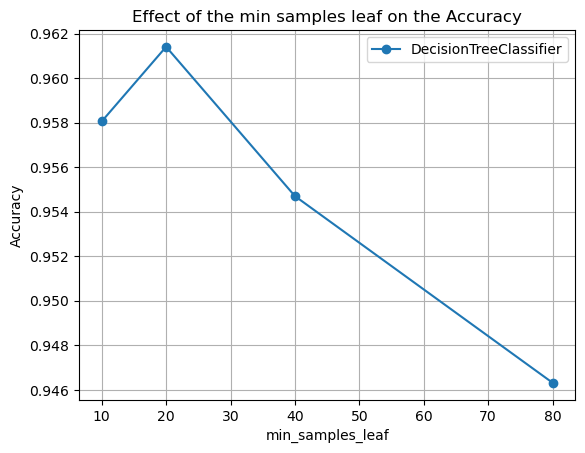

In [53]:
min_samples_leaf_values = [10, 20, 40, 80]
accuracy_scores = []


for min_samples_leaf in min_samples_leaf_values:

    dt_classifier = tree.DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, random_state=42)
    dt_classifier.fit(x_train, y_train)
    

    y_pred = dt_classifier.predict(x_test)
    

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.plot(min_samples_leaf_values, accuracy_scores, marker='o', label='DecisionTreeClassifier')
plt.title('Effect of the min samples leaf on the Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

min_samples_leaf : int or float, default=1
The minimum number of samples required to be at a leaf node.

We found out the best accuracy is achived when max_depth = 20

DecisionTree plot


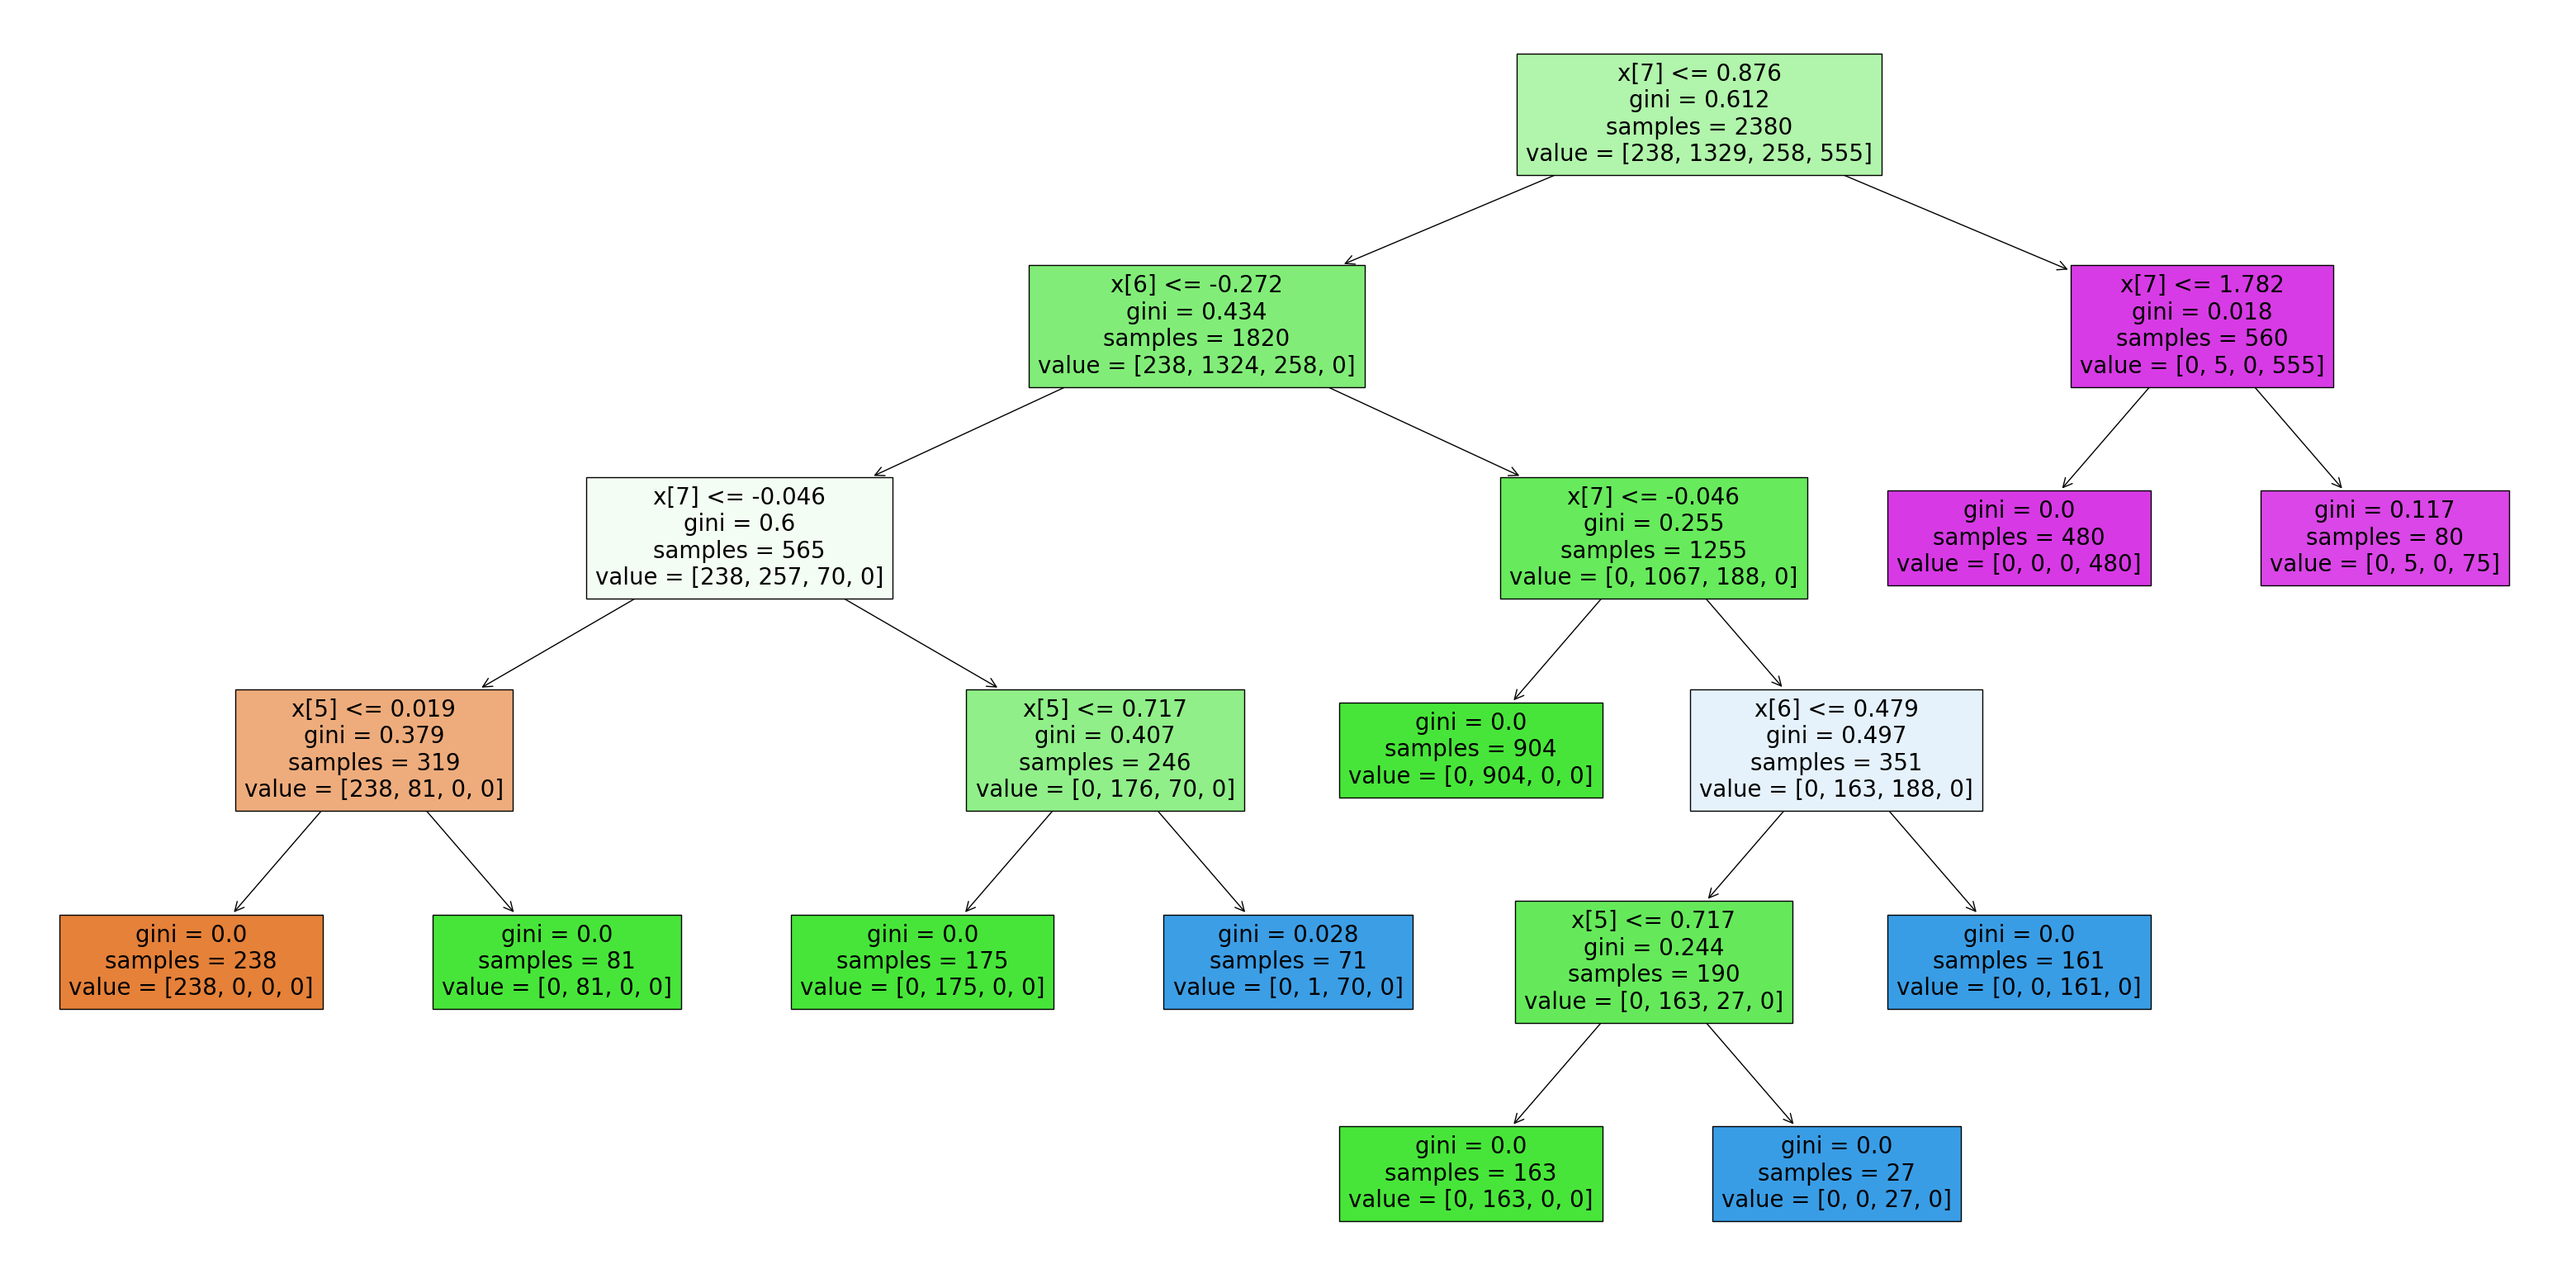

In [54]:
DTC =tree.DecisionTreeClassifier(max_depth=5, min_samples_split=100,min_samples_leaf=20, random_state=42)
dtc=DTC.fit(x_train, y_train)
plt.figure(figsize=(40,20))
tree.plot_tree(dtc,filled=True)
print('DecisionTree plot')

we draw our tree with the new values of the hyperparameters

In [55]:
DTC_accuracy = cross_val_score(DTC, x_train, y_train, scoring='accuracy', cv=3)
DTC_accuracy 

array([0.99496222, 0.99747793, 0.98738966])

In [56]:
DTC.fit(x_train,y_train)
y_pred =DTC.predict(x_test)
accuracy_score(y_test, y_pred)

0.9614093959731543

we tried to test our model on the testset . the accuracy is good and there is no overfitting since it is close to the accuracy of the training set

# Voting Classifier

In [57]:
clf1 = SGDClassifier()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()
clf4 = LogisticRegression()
clf5= SVC()
clf6=tree.DecisionTreeClassifier()

eclf = VotingClassifier(estimators=[ ('SGD', clf1), ('RF', clf2), ('KN', clf3),
                                   ('LG', clf4),  ('SVC', clf5),('DT', clf6)],voting='hard')

for clf, label in zip([clf1,clf2,clf3,clf4,clf5,clf6], 
                      [ 'SGD','RF','KN','LG','SVC','DT']):
    scores = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=3)
    print("Accuracy: %0.2f [%s]"%(scores.mean(), label))

Accuracy: 0.83 [SGD]
Accuracy: 0.99 [RF]
Accuracy: 0.88 [KN]
Accuracy: 0.89 [LG]
Accuracy: 0.92 [SVC]
Accuracy: 1.00 [DT]


we use voting when we have a weak learner, group of weak learners can achieve better performance than an individual one of them

we use hard voting which means the result will based on the most frequent value

# Decide which model is achieved the best accuracy

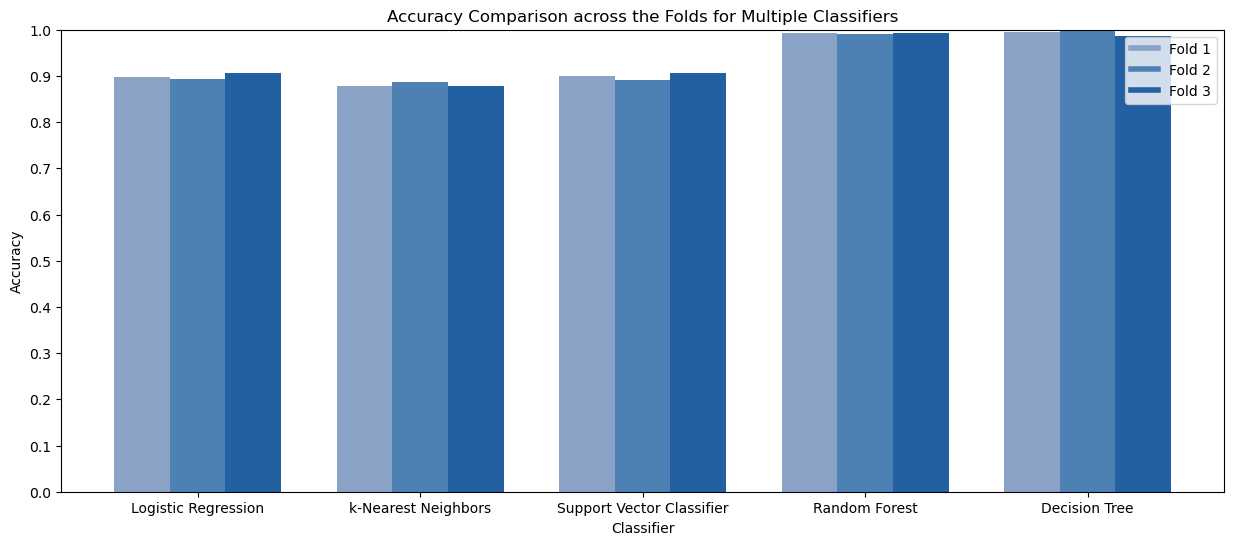

In [58]:

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}
 

cv_results = {}

cv_results[0] = logistic_accuracy
cv_results[1] = KNN_accuracy
cv_results[2] =SVC_accuracy
cv_results[3] = RF_accuracy
cv_results[4] = DTC_accuracy

plt.figure(figsize=(15, 6))
bar_width = 0.15
bar_positions = np.arange(len(classifiers)) * (bar_width * 4)


colors = ['#89A2C5', '#4D81B4', '#2260A1']

for fold, color in zip(range(3), colors):
    for idx, (clf_name, cv_scores) in enumerate(cv_results.items()):
        plt.bar(
            bar_positions[idx] + fold * bar_width,
            cv_scores[fold],
            width=bar_width,
            label=f'{clf_name} - Fold {fold + 1}',
            color=color
        )


legend_labels = [f'Fold {i + 1}' for i in range(3)]
legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
plt.legend(legend_handles, legend_labels)

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison across the Folds for Multiple Classifiers')
plt.xticks(bar_positions + bar_width, classifiers.keys())
plt.ylim([0, 1]) 
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()


as the plot shows Decision tree has the best accuracy

# Applying some technique on the  Decision tree

In [59]:
DTC =tree.DecisionTreeClassifier(max_depth=2, min_samples_split=10,min_samples_leaf=20, random_state=42)
y_pred = cross_val_predict(DTC, x_train, y_train, cv=3)
print("Classification Report:\n", classification_report(y_train, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       238
           1       0.73      1.00      0.84      1329
           2       0.00      0.00      0.00       258
           3       0.99      1.00      1.00       555

    accuracy                           0.79      2380
   macro avg       0.43      0.50      0.46      2380
weighted avg       0.64      0.79      0.70      2380



providing a report of the most popular performance measurement tools 

recall : is intrested on the number of FN ( how much values that is predicted as false when they actully True )

precision : is intrested on the number of FP ( how much values that is predicted as true when they actully false )

F1-score :combines the precision and recall 

In [60]:
pram = {'max_depth': [None, 3, 5, 10], 'min_samples_split': [20, 50, 100,200],'min_samples_leaf' :[10, 20, 40, 80]}
grid_search = GridSearchCV(dtc, pram, cv=3)
grid_search.fit(x_train, y_train)
tree_model = grid_search.best_estimator_
tree_model

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=20,
                       random_state=42)


Grid search is a hyperparameter tuning technique that involves searching through a predefined grid of hyperparameter values to find the combination that results in the best model performance. In machine learning, hyperparameters are parameters that are not learned from the data but are set prior to the training process. Hyperparameter tuning is the process of selecting the optimal values for these hyperparameters to improve the model's performance.

In [61]:
DTC_best =tree.DecisionTreeClassifier(max_depth=5, min_samples_split=10,min_samples_leaf=20, random_state=42)
y_pred = cross_val_predict(DTC_best, x_train, y_train, cv=3)
print("Classification Report:\n", classification_report(y_train, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       238
           1       1.00      0.99      0.99      1329
           2       0.98      1.00      0.99       258
           3       0.99      1.00      1.00       555

    accuracy                           0.99      2380
   macro avg       0.99      0.99      0.99      2380
weighted avg       0.99      0.99      0.99      2380



the report of  performance measurement tools after applying the grid search and use the best values of the hyperparameter

# Confusion matrix 

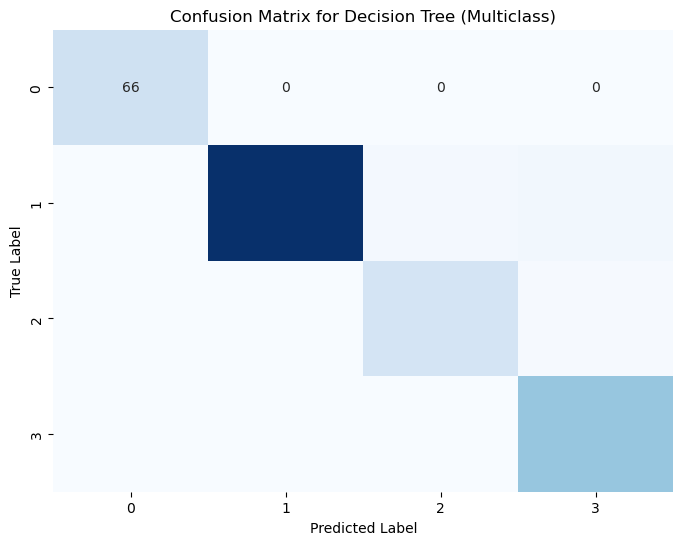

In [62]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
 

y_pred = dt_classifier.predict(x_test)
 

cm = confusion_matrix(y_test, y_pred)
 

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree (Multiclass)')
plt.show() 

In [63]:
cm


array([[ 66,   0,   0,   0],
       [  0, 322,   7,  11],
       [  0,   1,  57,   5],
       [  0,   1,   0, 126]], dtype=int64)

A confusion matrix is a table that  presents a summary of the predictions made by a model on a classification problem compared to the actual  values .

The confusion matrix for multiclass classification is a square matrix with dimensions equal to the number of classes.